In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [81]:
df = pd.read_csv('arima.csv')

In [82]:
df.set_index('YEAR', inplace=True)

In [83]:
result = adfuller(df['CAR'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.373861508759193
p-value: 0.14925009995476912


In [84]:
if result[1] > 0.05:
    df['CAR_diff'] = df['CAR'] - df['CAR'].shift(1)
    df.dropna(inplace=True)
else:
    df['CAR_diff'] = df['CAR']

In [85]:
model = ARIMA(df['CAR_diff'], order=(1, 1, 1))
results = model.fit()

C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
forecast = results.forecast(steps=3)  # Forecasting for 2024, 2025, and 2026

C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HEMANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


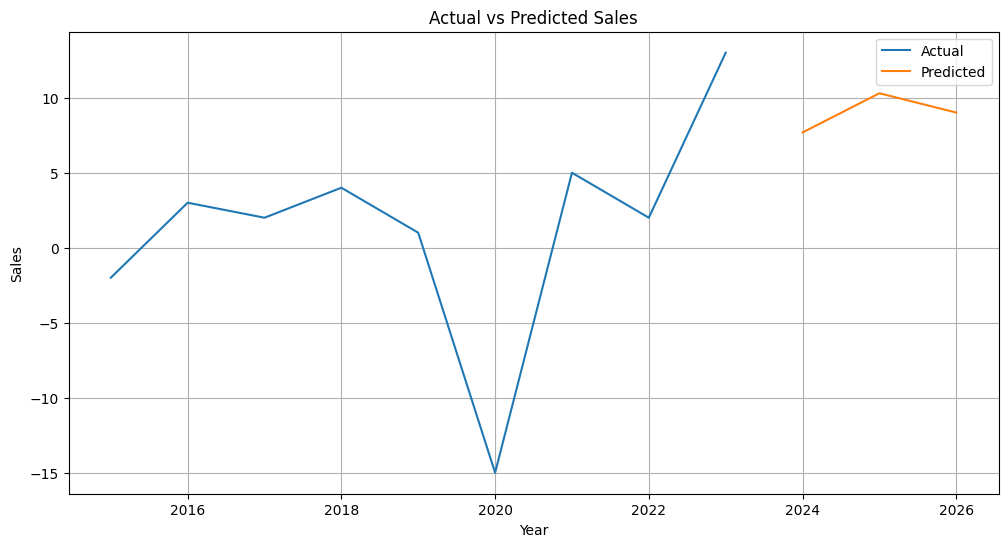

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CAR_diff'], label='Actual')
plt.plot(range(2024, 2027), forecast, label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()